(optimization-examples)=

# Examples for mathematical optimization page

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
# Machinery to store outputs for later use.
# This is for rendering in the Jupyter Book version of these pages.
from myst_nb import glue

(convex-function-eg)=

## Convex function

<!--- plot_convex -->

A figure showing the definition of a convex function:

In [3]:
x = np.linspace(-1, 2)

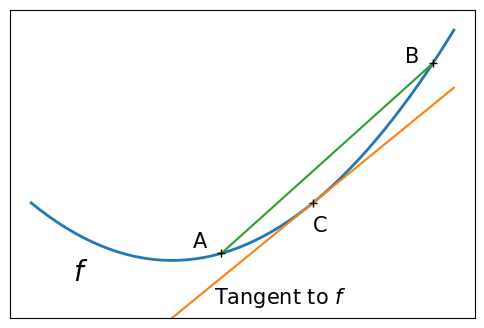

In [4]:
plt.figure(figsize=(6, 4))
# A convex function
plt.plot(x, x**2, linewidth=2)
plt.text(-0.7, -(0.6**2), "$f$", size=20)

# The tangent in one point
plt.plot(x, 2 * x - 1)
plt.plot(1, 1, "k+")
plt.text(0.3, -0.75, "Tangent to $f$", size=15)
plt.text(1, 1 - 0.5, "C", size=15)

# Convexity as barycenter
plt.plot([0.35, 1.85], [0.35**2, 1.85**2])
plt.plot([0.35, 1.85], [0.35**2, 1.85**2], "k+")
plt.text(0.35 - 0.2, 0.35**2 + 0.1, "A", size=15)
plt.text(1.85 - 0.2, 1.85**2, "B", size=15)

plt.ylim(ymin=-1)
plt.xticks([])
plt.yticks([])

# Store figure for use in page.
glue("convex_func", plt.gcf(), display=False)

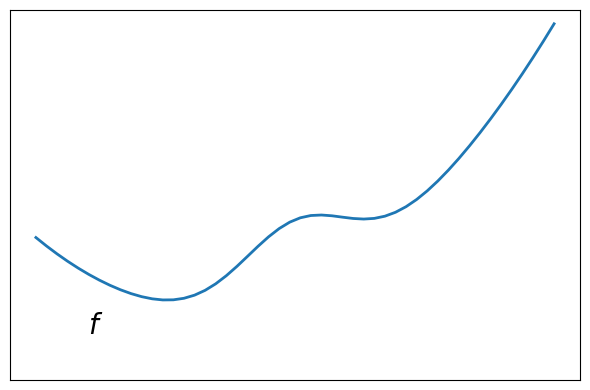

In [5]:
# Convexity as barycenter
plt.figure(figsize=(6, 4))
plt.plot(x, x**2 + np.exp(-5 * (x - 0.5) ** 2), linewidth=2)
plt.text(-0.7, -(0.6**2), "$f$", size=20)

plt.ylim(ymin=-1)
plt.xticks([])
plt.yticks([])
plt.tight_layout()

# Store figure for use in page.
glue("non_convex_func", plt.gcf(), display=False)

(smooth-function-eg)=

## Smooth and non-smooth functions

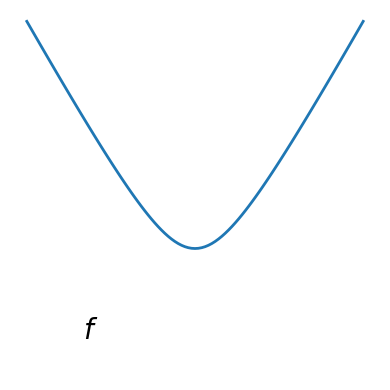

In [6]:
plt.figure(figsize=(4, 4))
x = np.linspace(-1.5, 1.5, 101)

# A smooth function

plt.plot(x, np.sqrt(0.2 + x**2), linewidth=2)
plt.text(-1, 0, "$f$", size=20)

plt.ylim(ymin=-0.2)
plt.axis("off")
plt.tight_layout()

# Store figure for use in page.
glue("smooth_func", plt.gcf(), display=False)

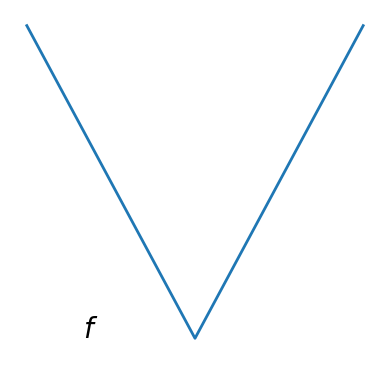

In [7]:
# A non-smooth function
plt.figure(figsize=(4, 4))
plt.plot(x, np.abs(x), linewidth=2)
plt.text(-1, 0, "$f$", size=20)

plt.ylim(ymin=-0.2)
plt.axis("off")
plt.tight_layout()

# Store figure for use in page.
glue("non_smooth_func", plt.gcf(), display=False)

(noisy-non-noisy-eg)=

## Noisy and non-noisy functions

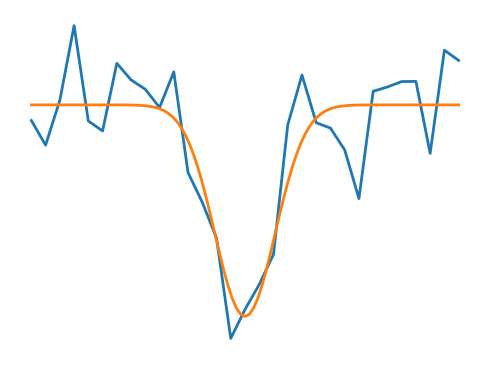

In [8]:
rng = np.random.default_rng(27446968)

x = np.linspace(-5, 5, 101)
x_ = np.linspace(-5, 5, 31)

# A smooth function
def f(x):
    return -np.exp(-(x**2))

plt.figure(figsize=(5, 4))
plt.plot(x_, f(x_) + 0.2 * rng.normal(size=31), linewidth=2)
plt.plot(x, f(x), linewidth=2)

plt.ylim(ymin=-1.3)
plt.axis("off")
plt.tight_layout()

# Store figure for use in page.
glue("noisy_non_noisy", plt.gcf(), display=False)

(constraints-eg)=

## Optimizing with constraints

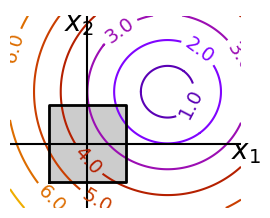

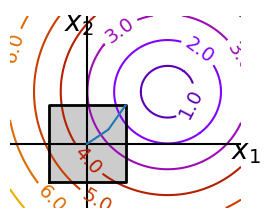

In [9]:
x, y = np.mgrid[-2.9:5.8:0.05, -2.5:5:0.05]  # type: ignore[misc]
x = x.T
y = y.T

def make_constraint_fig():
    fig = plt.figure(figsize=(3, 2.5))
    contours = plt.contour(
        np.sqrt((x - 3) ** 2 + (y - 2) ** 2),
        extent=[-3, 6, -2.5, 5],
        cmap="gnuplot",
    )
    plt.clabel(contours, inline=1, fmt="%1.1f", fontsize=14)
    plt.plot(
        [-1.5, -1.5, 1.5, 1.5, -1.5], [-1.5, 1.5, 1.5, -1.5, -1.5], "k", linewidth=2
    )
    plt.fill_between([-1.5, 1.5], [-1.5, -1.5], [1.5, 1.5], color=".8")
    plt.axvline(0, color="k")
    plt.axhline(0, color="k")

    plt.text(-0.9, 4.4, "$x_2$", size=20)
    plt.text(5.6, -0.6, "$x_1$", size=20)
    plt.axis("scaled")
    plt.axis("off")
    return fig

# Store figure for use in page.
glue("constraints_no_path", make_constraint_fig(), display=False)

# And now plot the optimization path
accumulator = []

def f(x):
    # Store the list of function calls
    accumulator.append(x)
    return np.sqrt((x[0] - 3) ** 2 + (x[1] - 2) ** 2)


# We don't use the gradient, as with the gradient, L-BFGS is too fast,
# and finds the optimum without showing us a pretty path
def f_prime(x):
    r = np.sqrt((x[0] - 3) ** 2 + (x[0] - 2) ** 2)
    return np.array(((x[0] - 3) / r, (x[0] - 2) / r))


sp.optimize.minimize(
    f, np.array([0, 0]), method="L-BFGS-B", bounds=((-1.5, 1.5), (-1.5, 1.5))
)
accumulated = np.array(accumulator)

fig = make_constraint_fig()
plt.plot(accumulated[:, 0], accumulated[:, 1]);

glue("constraints_path", fig, display=False)

(brents-method-eg)=

## Brent's method for convex and not-convex functions

In [10]:
x = np.linspace(-1, 3, 100)
x_0 = np.exp(-1)

def func(x, epsilon):
    return (x - x_0)**2 + epsilon * np.exp(-5 * (x - .5 - x_0)**2)

Converged at  6


Converged at  23


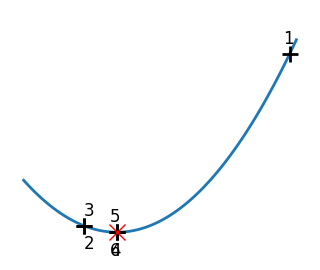

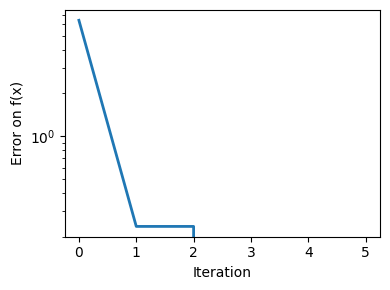

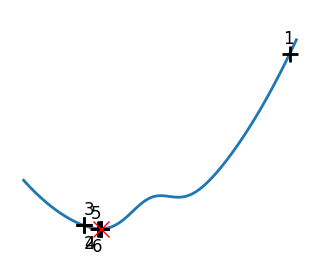

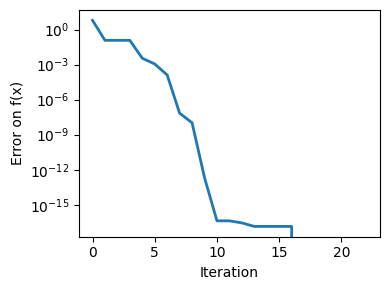

In [11]:
for epsilon in (0, 1):

    f = lambda x : func(x, epsilon)

    plt.figure(figsize=(3, 2.5))
    plt.axes((0, 0, 1, 1))

    # A convex function
    plt.plot(x, f(x), linewidth=2)

    # Apply Brent method. To have access to the iteration, do this in an
    # artificial way: allow the algorithm to iter only once
    all_x = []
    all_y = []
    for iter in range(30):
        result = sp.optimize.minimize_scalar(
            f,
            bracket=(-5, 2.9, 4.5),
            method="Brent",
            options={"maxiter": iter},
            tol=np.finfo(1.0).eps,
        )
        if result.success:
            print("Converged at ", iter)
            break

        this_x = result.x
        all_x.append(this_x)
        all_y.append(f(this_x))
        if iter < 6:
            plt.text(
                this_x - 0.05 * np.sign(this_x) - 0.05,
                f(this_x) + 1.2 * (0.3 - iter % 2),
                str(iter + 1),
                size=12,
            )

    plt.plot(all_x[:10], all_y[:10], "k+", markersize=12, markeredgewidth=2)

    plt.plot(all_x[-1], all_y[-1], "rx", markersize=12)
    plt.axis("off")
    plt.ylim(ymin=-1, ymax=8)

    # Store figure for use in page.
    glue(f"brent_epsilon_{epsilon}_func", plt.gcf(), display=False)

    plt.figure(figsize=(4, 3))
    plt.semilogy(np.abs(all_y - all_y[-1]), linewidth=2)
    plt.ylabel("Error on f(x)")
    plt.xlabel("Iteration")
    plt.tight_layout()

    # Store figure for use in page.
    glue(f"brent_epsilon_{epsilon}_err", plt.gcf(), display=False)

(gradient-descent-eg)=

## Gradient descent examples

An example demoing gradient descent by creating figures that trace the
evolution of the optimizer.

In [12]:
# Preparatory work for loading helper code.
import sys
import os

sys.path.append(os.path.abspath("helper"))

from cost_functions import (
    mk_quad,
    mk_gauss,
    rosenbrock,
    rosenbrock_prime,
    rosenbrock_hessian,
    LoggingFunction,
    CountingFunction,
)

In [13]:
x_min, x_max = -1, 2
y_min, y_max = 2.25 / 3 * x_min - 0.2, 2.25 / 3 * x_max - 0.2

A formatter to print values on contours:

In [14]:
def super_fmt(value):
    if value > 1:
        if np.abs(int(value) - value) < 0.1:
            out = f"$10^{{{int(value):d}}}$"
        else:
            out = f"$10^{{{value:.1f}}}$"
    else:
        value = np.exp(value - 0.01)
        if value > 0.1:
            out = f"{value:1.1f}"
        elif value > 0.01:
            out = f"{value:.2f}"
        else:
            out = f"{value:.2e}"
    return out

A gradient descent algorithm.

Do not use for production work: its a toy, use scipy's `optimize.fmin_cg`

In [15]:
def gradient_descent(x0, f, f_prime, hessian=None, adaptative=False):
    x_i, y_i = x0
    all_x_i = []
    all_y_i = []
    all_f_i = []

    for i in range(1, 100):
        all_x_i.append(x_i)
        all_y_i.append(y_i)
        all_f_i.append(f([x_i, y_i]))
        dx_i, dy_i = f_prime(np.asarray([x_i, y_i]))
        if adaptative:
            # Compute a step size using a line_search to satisfy the Wolf
            # conditions
            step = sp.optimize.line_search(
                f,
                f_prime,
                np.r_[x_i, y_i],
                -np.r_[dx_i, dy_i],
                np.r_[dx_i, dy_i],
                c2=0.05,
            )
            step = step[0]
            if step is None:
                step = 0
        else:
            step = 1
        x_i += -step * dx_i
        y_i += -step * dy_i
        if np.abs(all_f_i[-1]) < 1e-16:
            break
    return all_x_i, all_y_i, all_f_i


def gradient_descent_adaptative(x0, f, f_prime, hessian=None):
    return gradient_descent(x0, f, f_prime, adaptative=True)


def conjugate_gradient(x0, f, f_prime, hessian=None):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]

    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))

    sp.optimize.minimize(
        f, x0, jac=f_prime, method="CG", callback=store, options={"gtol": 1e-12}
    )
    return all_x_i, all_y_i, all_f_i


def newton_cg(x0, f, f_prime, hessian):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]

    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))

    sp.optimize.minimize(
        f,
        x0,
        method="Newton-CG",
        jac=f_prime,
        hess=hessian,
        callback=store,
        options={"xtol": 1e-12},
    )
    return all_x_i, all_y_i, all_f_i


def bfgs(x0, f, f_prime, hessian=None):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]

    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))

    sp.optimize.minimize(
        f, x0, method="BFGS", jac=f_prime, callback=store, options={"gtol": 1e-12}
    )
    return all_x_i, all_y_i, all_f_i


def powell(x0, f, f_prime, hessian=None):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]

    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))

    sp.optimize.minimize(
        f, x0, method="Powell", callback=store, options={"ftol": 1e-12}
    )
    return all_x_i, all_y_i, all_f_i


def nelder_mead(x0, f, f_prime, hessian=None):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]

    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))

    sp.optimize.minimize(
        f, x0, method="Nelder-Mead", callback=store, options={"ftol": 1e-12}
    )
    return all_x_i, all_y_i, all_f_i

Run different optimizers on these problems.

/Users/mb312/.virtualenvs/sp-lectures/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/var/folders/vr/b3dbt6vd3pd73sjc_t9xj87r0000gn/T/ipykernel_13091/1172030723.py:15: LineSearchWarning: The line search algorithm did not converge
  step = sp.optimize.line_search(


/var/folders/vr/b3dbt6vd3pd73sjc_t9xj87r0000gn/T/ipykernel_13091/2509265308.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(3, 2.5))


/var/folders/vr/b3dbt6vd3pd73sjc_t9xj87r0000gn/T/ipykernel_13091/1172030723.py:124: OptimizeWarning: Unknown solver options: ftol
  sp.optimize.minimize(


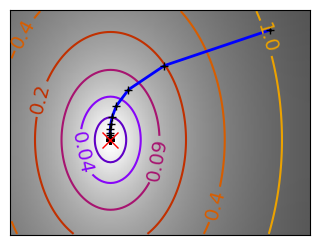

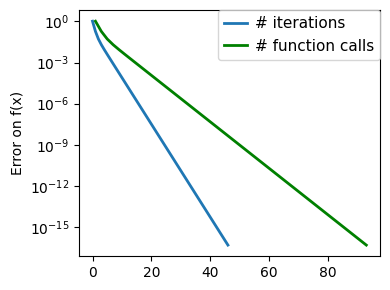

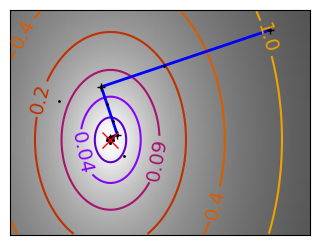

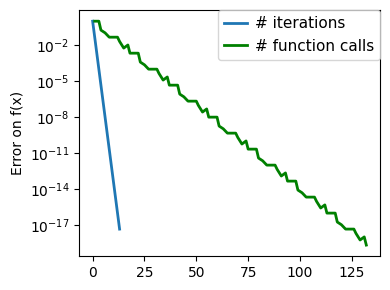

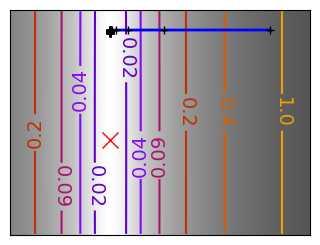

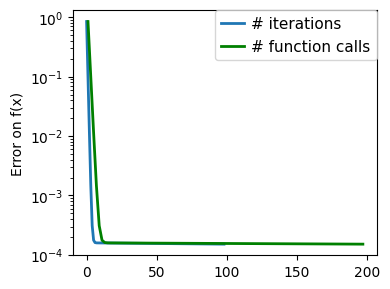

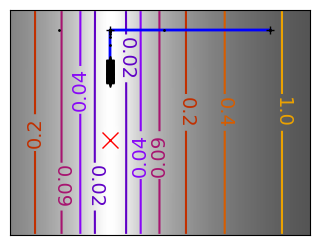

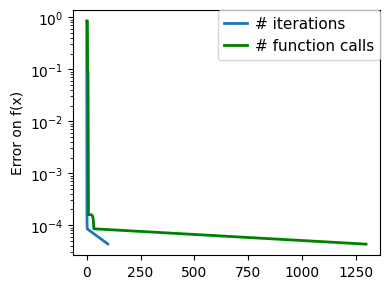

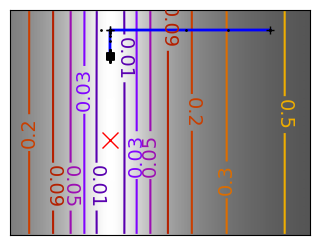

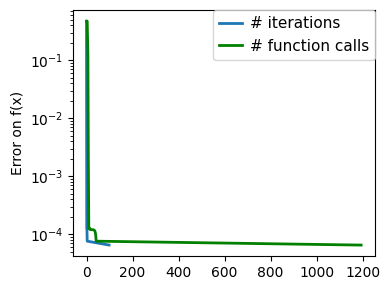

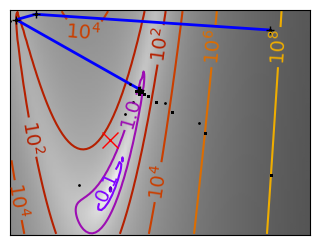

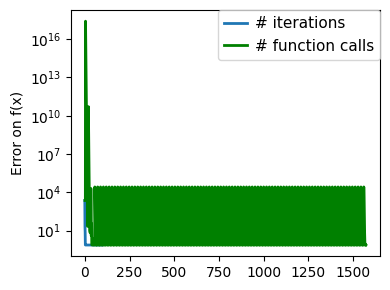

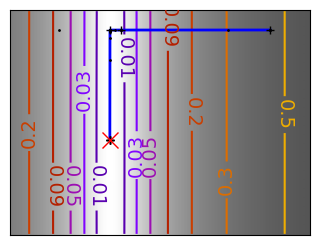

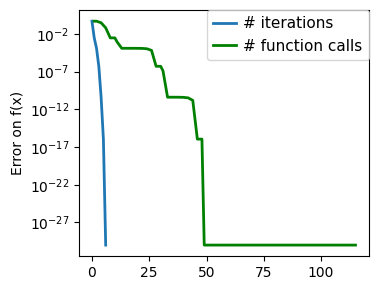

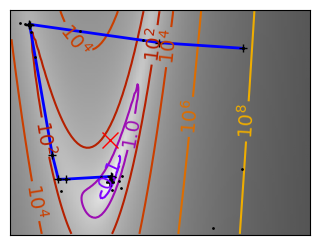

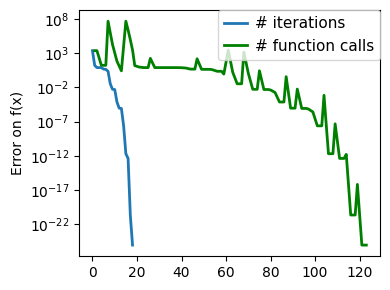

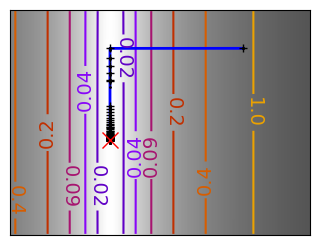

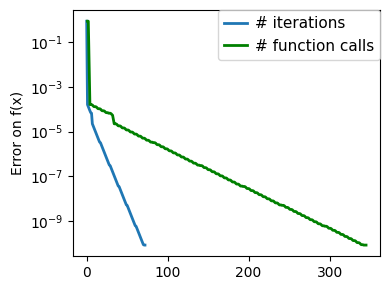

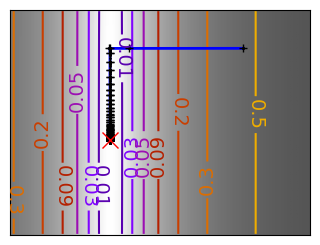

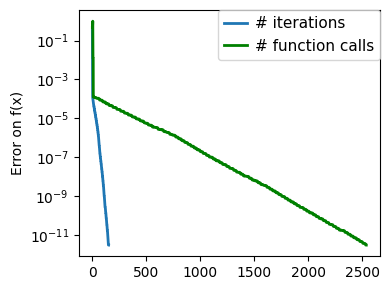

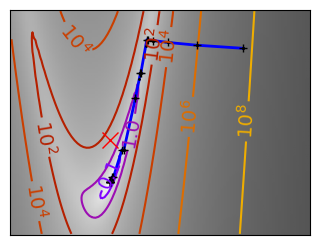

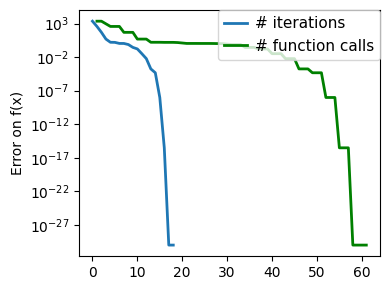

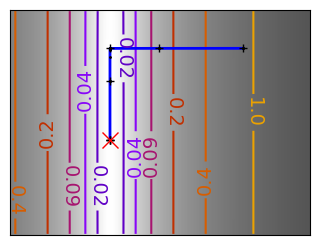

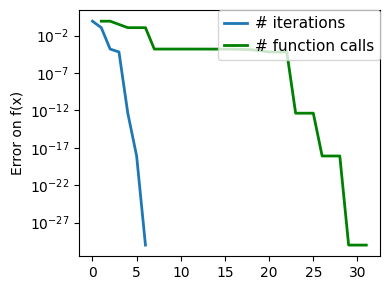

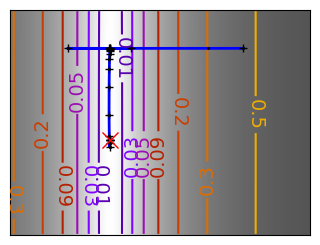

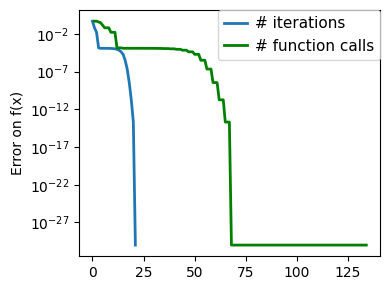

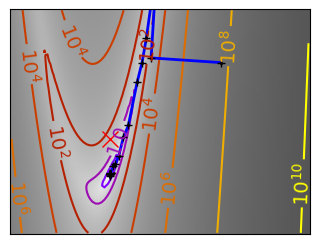

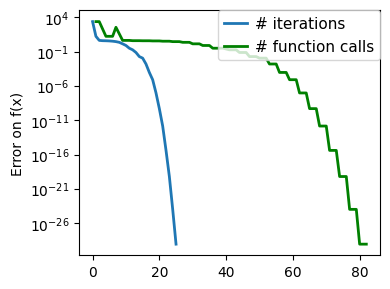

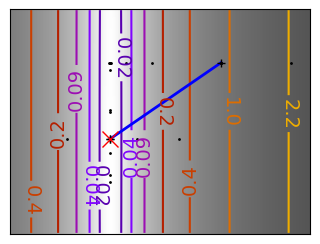

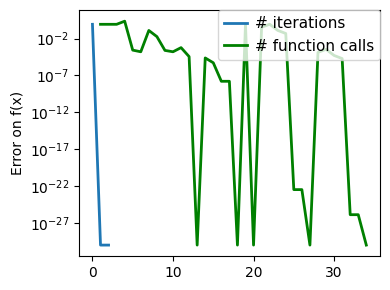

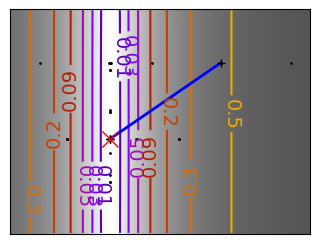

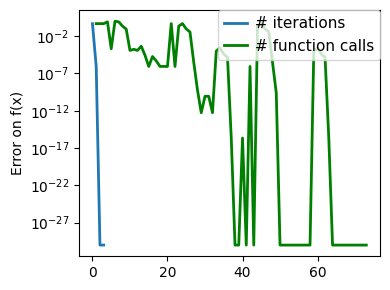

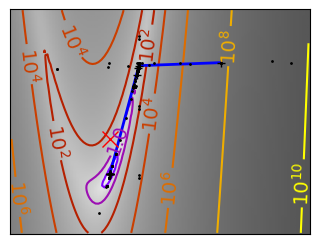

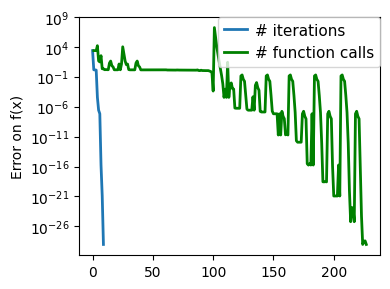

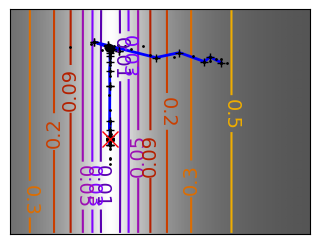

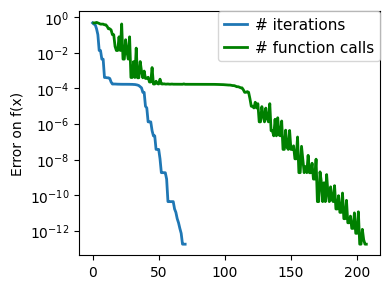

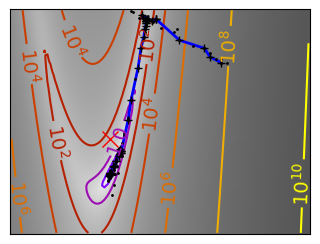

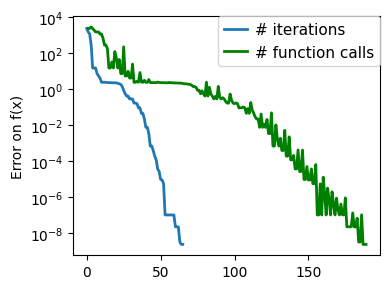

In [16]:
levels = {}

for name, (f, f_prime, hessian), optimizer in (
    ('q_07_gd', mk_quad(0.7), gradient_descent),
    ('q_07_gda', mk_quad(0.7), gradient_descent_adaptative),
    ('q_002_gd', mk_quad(0.02), gradient_descent),
    ('q_002_gda', mk_quad(0.02), gradient_descent_adaptative),
    ('g_002_gda', mk_gauss(0.02), gradient_descent_adaptative),
    (
        'rb_gda',
        (rosenbrock, rosenbrock_prime, rosenbrock_hessian),
        gradient_descent_adaptative,
    ),
    ('g_002_cg', mk_gauss(0.02), conjugate_gradient),
    (
        'rb_cg',
        (rosenbrock, rosenbrock_prime, rosenbrock_hessian),
        conjugate_gradient,
    ),
    ('q_002_ncg', mk_quad(0.02), newton_cg),
    ('g_002_ncg', mk_gauss(0.02), newton_cg),
    (
        'rb_ncg',
        (rosenbrock, rosenbrock_prime, rosenbrock_hessian),
        newton_cg,
    ),
    ('q_002_bgfs', mk_quad(0.02), bfgs),
    ('g_002_bgfs', mk_gauss(0.02), bfgs),
    ('rb_bgfs', (rosenbrock, rosenbrock_prime, rosenbrock_hessian), bfgs),
    ('q_002_pow', mk_quad(0.02), powell),
    ('g_002_pow', mk_gauss(0.02), powell),
    ('rb_pow', (rosenbrock, rosenbrock_prime, rosenbrock_hessian), powell),
    ('g_002_nm', mk_gauss(0.02), nelder_mead),
    ('rb_nm', (rosenbrock, rosenbrock_prime, rosenbrock_hessian), nelder_mead),
):
    # Compute a gradient-descent
    x_i, y_i = 1.6, 1.1
    counting_f_prime = CountingFunction(f_prime)
    counting_hessian = CountingFunction(hessian)
    logging_f = LoggingFunction(f, counter=counting_f_prime.counter)
    all_x_i, all_y_i, all_f_i = optimizer(
        np.array([x_i, y_i]), logging_f, counting_f_prime, hessian=counting_hessian
    )

    # Plot the contour plot
    if not max(all_y_i) < y_max:
        x_min *= 1.2
        x_max *= 1.2
        y_min *= 1.2
        y_max *= 1.2
    x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    x = x.T
    y = y.T

    plt.figure(figsize=(3, 2.5))
    plt.axes([0, 0, 1, 1])

    X = np.concatenate((x[np.newaxis, ...], y[np.newaxis, ...]), axis=0)
    z = np.apply_along_axis(f, 0, X)
    log_z = np.log(z + 0.01)
    plt.imshow(
        log_z,
        extent=[x_min, x_max, y_min, y_max],
        cmap=plt.cm.gray_r,
        origin="lower",
        vmax=log_z.min() + 1.5 * np.ptp(log_z),
    )
    contours = plt.contour(
        log_z,
        levels=levels.get(f),
        extent=[x_min, x_max, y_min, y_max],
        cmap=plt.cm.gnuplot,
        origin="lower",
    )
    levels[f] = contours.levels
    plt.clabel(contours, inline=1, fmt=super_fmt, fontsize=14)

    plt.plot(all_x_i, all_y_i, "b-", linewidth=2)
    plt.plot(all_x_i, all_y_i, "k+")

    plt.plot(logging_f.all_x_i, logging_f.all_y_i, "k.", markersize=2)

    plt.plot([0], [0], "rx", markersize=12)

    plt.xticks(())
    plt.yticks(())
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Store figure for use in page.
    glue(f'gradient_descent_{name}_func', plt.gcf(), display=False)

    plt.figure(figsize=(4, 3))
    plt.semilogy(np.maximum(np.abs(all_f_i), 1e-30),
                 linewidth=2,
                 label="# iterations")
    plt.ylabel("Error on f(x)")
    plt.semilogy(
        logging_f.counts,
        np.maximum(np.abs(logging_f.all_f_i), 1e-30),
        linewidth=2,
        color="g",
        label="# function calls",
    )
    plt.legend(
        loc="upper right",
        frameon=True,
        prop={"size": 11},
        borderaxespad=0,
        handlelength=1.5,
        handletextpad=0.5,
    )
    plt.tight_layout()

    # Store figure for use in page.
    glue(f'gradient_descent_{name}_err', plt.gcf(), display=False)

(compare-optimizers-eg)=

## Plotting the comparison of optimizers

Plots the results from the comparison of optimizers.

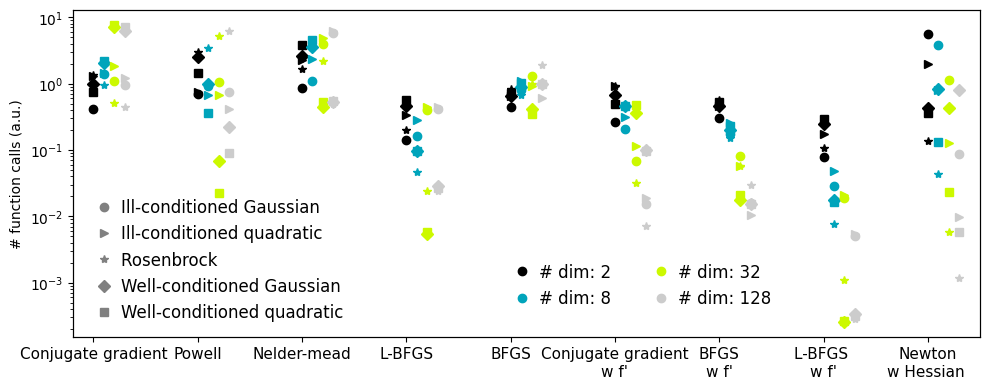

In [17]:
import pickle

with open('helper/compare_optimizers_py3.pkl', 'rb') as fobj:
    results = pickle.load(fobj)

n_methods = len(list(results.values())[0]["Rosenbrock  "])
n_dims = len(results)

symbols = "o>*Ds"

plt.figure(1, figsize=(10, 4))
plt.clf()

nipy_spectral = plt.colormaps["nipy_spectral"]
colors = nipy_spectral(np.linspace(0, 1, n_dims))[:, :3]

method_names = list(list(results.values())[0]["Rosenbrock  "].keys())
method_names.sort(key=lambda x: x[::-1], reverse=True)

for n_dim_index, ((n_dim, n_dim_bench), color) in enumerate(
    zip(sorted(results.items()), colors, strict=True)
):
    for (cost_name, cost_bench), symbol in zip(
        sorted(n_dim_bench.items()), symbols, strict=True
    ):
        for (
            method_index,
            method_name,
        ) in enumerate(method_names):
            this_bench = cost_bench[method_name]
            bench = np.mean(this_bench)
            plt.semilogy([method_index + 0.1 * n_dim_index],
                         [bench],
                         marker=symbol,
                         color=color)

# Create a legend for the problem type
for cost_name, symbol in zip(sorted(n_dim_bench.keys()), symbols, strict=True):
    plt.semilogy([-10], [0], symbol, color=".5", label=cost_name)

plt.xticks(np.arange(n_methods), method_names, size=11)
plt.xlim(-0.2, n_methods - 0.5)
plt.legend(loc="best", numpoints=1, handletextpad=0, prop={"size": 12}, frameon=False)
plt.ylabel("# function calls (a.u.)")

# Create a second legend for the problem dimensionality
plt.twinx()

for n_dim, color in zip(sorted(results.keys()), colors, strict=True):
    plt.plot([-10], [0], "o", color=color, label=f"# dim: {n_dim}")

plt.legend(
    loc=(0.47, 0.07),
    numpoints=1,
    handletextpad=0,
    prop={"size": 12},
    frameon=False,
    ncol=2,
)
plt.xlim(-0.2, n_methods - 0.5)

plt.xticks(np.arange(n_methods), method_names)
plt.yticks(())

plt.tight_layout()

# Store figure for use in page.
glue(f'compare_optimizers', plt.gcf(), display=False)

(constraints-non-bounds-eg)=

## Optimization with constraints, SLSQP and COBYLA

An example showing how to do optimization with general constraints using SLSQP
and COBYLA.

In [18]:
x, y = np.mgrid[-2.03:4.2:0.04, -1.6:3.2:0.04]
x = x.T
y = y.T

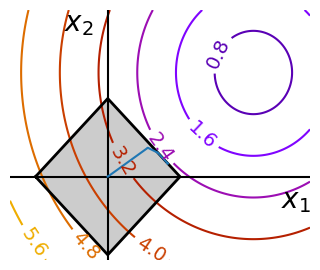

In [19]:
plt.figure(figsize=(3, 2.5))
plt.axes((0, 0, 1, 1))

contours = plt.contour(
    np.sqrt((x - 3) ** 2 + (y - 2) ** 2),
    extent=[-2.03, 4.2, -1.6, 3.2],
    cmap="gnuplot",
)
plt.clabel(contours, inline=1, fmt="%1.1f", fontsize=14)
plt.plot([-1.5, 0, 1.5, 0, -1.5], [0, 1.5, 0, -1.5, 0], "k", linewidth=2)
plt.fill_between([-1.5, 0, 1.5], [0, -1.5, 0], [0, 1.5, 0], color=".8")
plt.axvline(0, color="k")
plt.axhline(0, color="k")

plt.text(-0.9, 2.8, "$x_2$", size=20)
plt.text(3.6, -0.6, "$x_1$", size=20)
plt.axis("tight")
plt.axis("off")

# And now plot the optimization path
accumulator = []


def f(x):
    # Store the list of function calls
    accumulator.append(x)
    return np.sqrt((x[0] - 3) ** 2 + (x[1] - 2) ** 2)


def constraint(x):
    return np.atleast_1d(1.5 - np.sum(np.abs(x)))


sp.optimize.minimize(
    f, np.array([0, 0]), method="SLSQP", constraints={"fun": constraint, "type": "ineq"}
)

accumulated = np.array(accumulator)
plt.plot(accumulated[:, 0], accumulated[:, 1])

# Store figure for use in page.
glue(f'constraints_non_bounds', plt.gcf(), display=False)